## Observations and Insights 
1. Capomulin and Ramicane seem to be more effective treatments than Infubinol and Ceftamin, with mouse x401's tumor decreasing significantly over time. 
2. Mouse weight does seem to have an effect on tumor size. 
3. While there is a large number of mice in this study, perhaps the weight of the mouse could be taken more into consideration when designing future studies because there is a wide range of weights, which could effect results. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_study_results)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = mouse_study_results[mouse_study_results.duplicated(['Mouse ID','Timepoint'])]
duplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_results = mouse_study_results.drop_duplicates(subset = ['Mouse ID','Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_results)

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_mouse = mouse_study_results.groupby(by=['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_mouse = grouped_mouse['Tumor Volume (mm3)'].mean()
median_mouse = grouped_mouse['Tumor Volume (mm3)'].median()
variance_mouse = grouped_mouse['Tumor Volume (mm3)'].var()
std_mouse = grouped_mouse['Tumor Volume (mm3)'].std()
sem_mouse = grouped_mouse['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.merge(std_mouse, sem_mouse, on = 'Drug Regimen', suffixes =('_std','_sem'))
summary_stats = pd.merge(summary_stats, mean_mouse, on = 'Drug Regimen')
summary_stats = pd.merge(summary_stats, median_mouse, on = 'Drug Regimen', suffixes =('_mean','_median'))
summary_stats = pd.merge(summary_stats, variance_mouse, on = 'Drug Regimen')
summary_stats.columns = ['Tumor Volume (mm3) standard deviation', 'Tumor Volume (mm3) SEM', 'Tumor Volume (mm3) mean',
                         'Tumor Volume (mm3) median', 'Tumor Volume (mm3) variance']
                         
summary_stats


,Tumor Volume (mm3) standard deviation,Tumor Volume (mm3) SEM,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) variance
Drug Regimen,,,,,
Capomulin,4.994774,0.329346,40.675741,41.557809,24.947764
Ceftamin,6.268188,0.469821,52.591172,51.776157,39.290177
Infubinol,6.567243,0.492236,52.884795,51.820584,43.128684
Ketapril,8.279709,0.603860,55.235638,53.698743,68.553577
Naftisol,8.134708,0.596466,54.331565,52.509285,66.173479
Placebo,7.821003,0.581331,54.033581,52.288934,61.168083
Propriva,6.568014,0.525862,52.393463,50.909965,43.138803
Ramicane,4.846308,0.320955,40.216745,40.673236,23.486704
Stelasyn,7.710419,0.573111,54.233149,52.431737,59.450562


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats.agg(['mean'])

,Tumor Volume (mm3) standard deviation,Tumor Volume (mm3) SEM,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) variance
mean,6.815695,0.500938,50.983236,49.948493,47.787119


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = grouped_mouse.count()
regimen_count = regimen_count['Mouse ID']
regimen_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

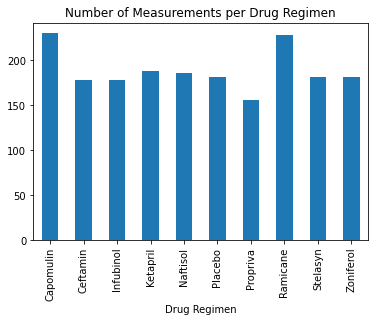

In [10]:
regimen_count.plot(kind = 'bar', title = 'Number of Measurements per Drug Regimen')


In [11]:

measurements = grouped_mouse.count()
measurements = measurements['Mouse ID'].to_frame()
measurements = measurements.reset_index()
measurements

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0, 0.5, 'Number of Measurements')

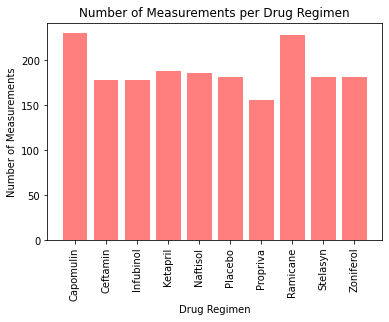

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(measurements))
tick_locations = [value for value in x_axis]
plt.figure()
plt.bar(x_axis, measurements['Mouse ID'], color = 'r', alpha = 0.5, align = 'center')
plt.xticks(tick_locations, measurements['Drug Regimen'], rotation = 'vertical')
plt.title('Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

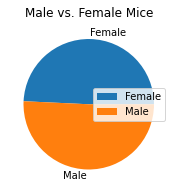

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_study_results.groupby(by=['Sex'])
mouse_sex = mouse_sex['Sex'].count()
sexes = ["Female","Male"]
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))


plt.pie(mouse_sex, labels = sexes)
ax.set_title("Male vs. Female Mice")
plt.legend(loc= "right")

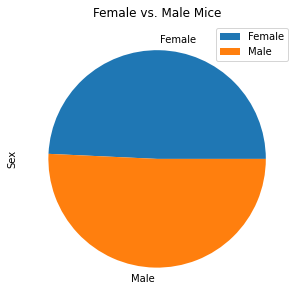

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_df = pd.DataFrame(mouse_sex)

plot = mouse_sex_df.plot.pie(y='Sex', figsize = (5,5), title = "Female vs. Male Mice")


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = grouped_mouse['Timepoint'].max()
last_timepoint
 # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_index = mouse_study_results.set_index('Timepoint')
timepoint_index

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,,,
0,k403,Ramicane,Male,21,16,45.000000,0
5,k403,Ramicane,Male,21,16,38.825898,0
10,k403,Ramicane,Male,21,16,35.014271,1
15,k403,Ramicane,Male,21,16,34.223992,1
20,k403,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...
25,z969,Naftisol,Male,9,30,63.145652,2
30,z969,Naftisol,Male,9,30,65.841013,3
35,z969,Naftisol,Male,9,30,69.176246,4


In [16]:
#get data from final timepoint
max_volume = timepoint_index.loc[45]
max_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,,,
45,k403,Ramicane,Male,21,16,22.050126,1
45,s185,Capomulin,Female,3,17,23.343598,1
45,x401,Capomulin,Female,16,15,28.484033,0
45,m601,Capomulin,Male,22,17,28.430964,1
45,g791,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...
45,y769,Ceftamin,Female,6,27,68.594745,4
45,y865,Ceftamin,Male,23,26,64.729837,3
45,z581,Infubinol,Female,24,25,62.754451,3


In [17]:
#change index to Drug Regimen for loc
boxplot_data = max_volume.set_index("Drug Regimen")
#grab data from specific drugs
Capomulin = boxplot_data.loc[["Capomulin"]]
Ramicane = boxplot_data.loc[["Ramicane"]]
Infubinol = boxplot_data.loc[["Infubinol"]]
Ceftamin = boxplot_data.loc[["Ceftamin"]]

{'whiskers': [<matplotlib.lines.Line2D at 0x2ce34214c40>,
 'caps': [<matplotlib.lines.Line2D at 0x2ce34210070>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ce342148e0>,
 'medians': [<matplotlib.lines.Line2D at 0x2ce34225190>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ce34225490>,
 'means': []}

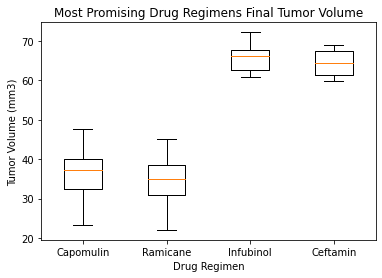

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
data = [Capomulin["Tumor Volume (mm3)"].values,
     Ramicane["Tumor Volume (mm3)"].values,
     Infubinol["Tumor Volume (mm3)"].values,
     Ceftamin["Tumor Volume (mm3)"].values]
ax1.set_title("Most Promising Drug Regimens Final Tumor Volume")
green_diamond = dict(markerfacecolor="g", marker="D")
Drugs =["Capomulin","Ramicane","Infubinol","Ceftamin"]
ax1.set_xticklabels(Drugs)
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(data,flierprops=green_diamond)

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

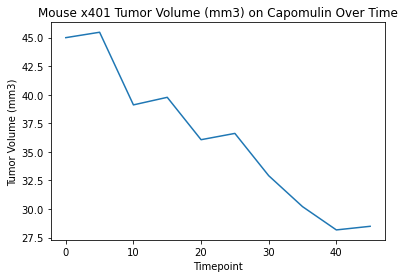

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
MouseID_index = mouse_study_results.set_index("Mouse ID")
x401 = MouseID_index.loc["x401"]
plt.plot(x401["Timepoint"].values, x401["Tumor Volume (mm3)"])
plt.title("Mouse x401 Tumor Volume (mm3) on Capomulin Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show

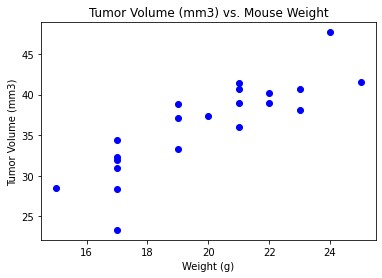

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin["Weight (g)"].values
plt.title("Tumor Volume (mm3) vs. Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.scatter(Capomulin["Weight (g)"].values, Capomulin["Tumor Volume (mm3)"].values, marker = "o", facecolors = "blue")

## Correlation and Regression

The r-squared is: 0.720923104644634
y = 1.72x + 2.0


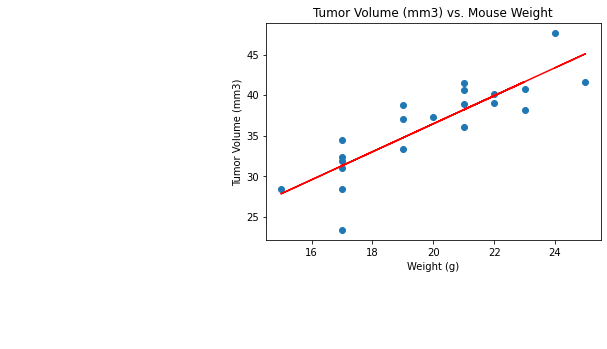

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
x_values = Capomulin["Weight (g)"].values
y_values = Capomulin["Tumor Volume (mm3)"].values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Tumor Volume (mm3) vs. Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show
print(f"The r-squared is: {rvalue**2}")
print(line_eq)